# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
import warnings
import os

from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from datasets import Dataset
from transformers import (
    DataCollatorWithPadding,
    DistilBertForSequenceClassification,
    DistilBertTokenizer,
    TrainingArguments,
    Trainer,
)

sns.set(palette="Set2")

2024-05-04 20:13:38.006106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 20:13:38.006249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 20:13:38.164023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

Решение см. в файле 9_task_1.pdf

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:**  Как мы увидели в предыдущей задаче, $S^2$ не является несмещенной; но если взять $\frac{n}{n-1}S^2$, то как раз получим несмещенную оценку.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите презентацию по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
# y - номер оценки
plt.scatter(<независимые оценки> , np.zeros(k) + y, 
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

**Решение:**

In [17]:
def s_square(smpl):
    return np.mean(smpl**2) - np.mean(smpl) ** 2

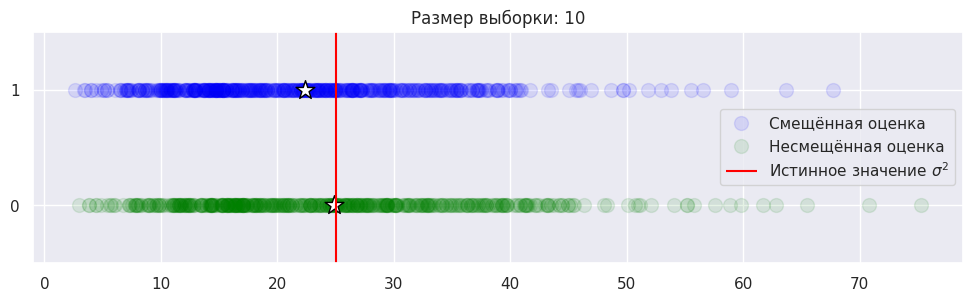

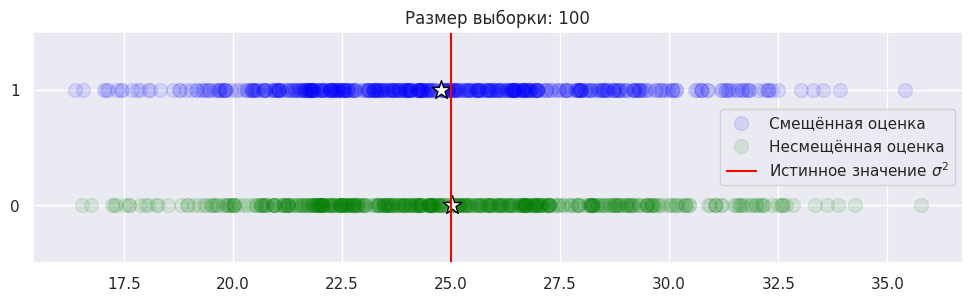

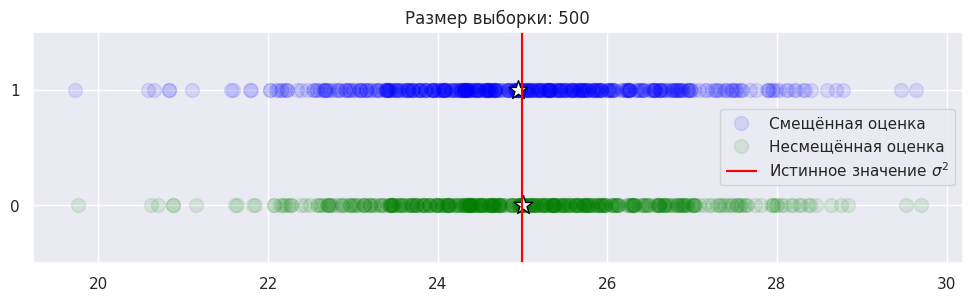

In [31]:
sigma_true = 5
k = 500

for n in [10, 100, 500]:
    biased_estimates = []
    unbiased_estimates = []

    for _ in range(k):
        samples = np.random.normal(0, sigma_true, n)
        biased_estimate = s_square(samples)
        biased_estimates.append(biased_estimate)
        unbiased_estimates.append(biased_estimate * n / (n - 1))

    biased_estimates = np.array(biased_estimates)
    unbiased_estimates = np.array(unbiased_estimates)

    plt.figure(figsize=(12, 3))

    plt.scatter(
        biased_estimates,
        np.zeros(k) + 1,
        alpha=0.1,
        s=100,
        color="blue",
        label="Смещённая оценка",
    )
    plt.scatter(
        biased_estimates.mean(), 1, marker="*", s=200, color="w", edgecolors="black"
    )
    plt.scatter(
        unbiased_estimates,
        np.zeros(k),
        alpha=0.1,
        s=100,
        color="green",
        label="Несмещённая оценка",
    )
    plt.scatter(
        unbiased_estimates.mean(), 0, marker="*", s=200, color="w", edgecolors="black"
    )

    plt.vlines(
        sigma_true**2, -0.5, 1.5, color="r", label="Истинное значение $\\sigma^2$"
    )
    plt.title(f"Размер выборки: {n}")
    plt.ylim(-0.5, 1.5)
    plt.yticks([0, 1])
    plt.legend()
    plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя функции из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [32]:
def s_square_2d(smpl):
    return np.mean(smpl**2, axis=1) - np.mean(smpl, axis=1) ** 2

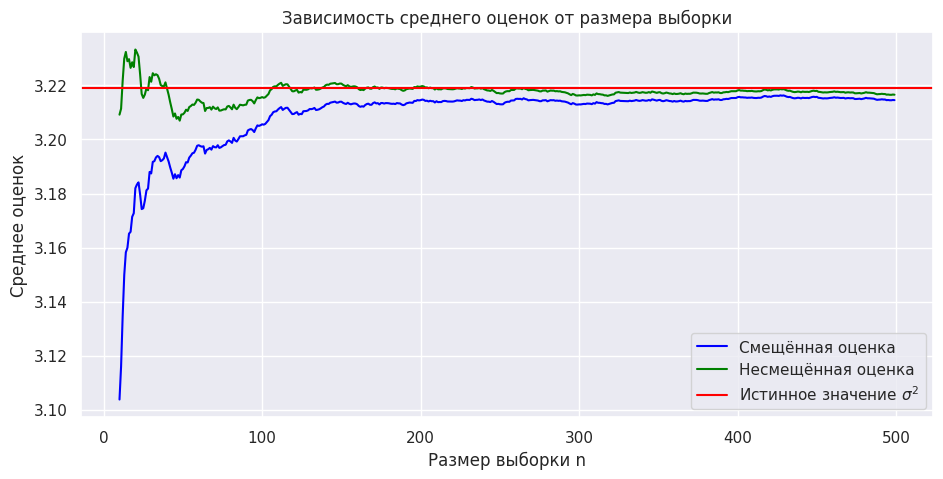

In [61]:
max_size = 500
large_sample = np.random.normal(0, sigma_true, (k, max_size))

biased_estimates = []
unbiased_estimates = []

for n in range(10, max_size):
    biased_estimate = np.mean(s_square_2d(large_sample[:, :n]))
    biased_estimates.append(biased_estimate)
    unbiased_estimates.append(biased_estimate * n / (n - 1))

plt.figure(figsize=(11, 5))
plt.plot(
    range(10, max_size),
    np.log(biased_estimates),
    color="blue",
    label="Смещённая оценка",
)
plt.plot(
    range(10, max_size),
    np.log(unbiased_estimates),
    color="green",
    label="Несмещённая оценка",
)
plt.axhline(y=np.log(sigma_true**2), color="red", label="Истинное значение $\\sigma^2$")
plt.title("Зависимость среднего оценок от размера выборки")
plt.xlabel("Размер выборки n")
plt.ylabel("Среднее оценок")
plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? 

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

1. Как мы видим, оба эксперимента показали, что несмещенная оценка точнее смещенной, особенно при меньших размерах выборки.
2. Но и с ростом n несмещенная оценка ближе к истинному значению оцениваемого параметра.
3. Свойство несмещенности оценки, как можно понять, говорит о том, что она не будет, в отличие от смещенной, находиться на каком-то расстоянии от реального значения параметра. Это отчетливо видно по синей кривой, которая, в отличие от зеленой, сохраняет дистанцию от красной прямой.
4. Эксперименты подтвердили, что $S^2$ - смещенная оценка, а $\frac{n}{n-1}S^2$ - несмещенная
5. В лабораторных по физике при оценке погрешности используют $n-1$ как раз, чтобы добиться несмещенноси этой оценки. Поскольку при использовании $n$ оценка будет систематически занижаться. (Но я не ПМФ))

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.
 
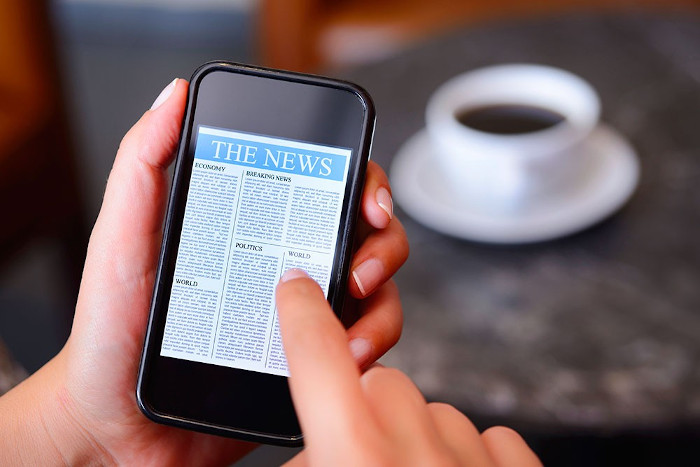



---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [2]:
# удаляем заголовки и подписи
remove = ("headers", "footers")
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset="train", shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset="test", shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [3]:
print(data_train["data"][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [4]:
data_train["target"]

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [5]:
data_train["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [6]:
X_train = data_train.data
y_train = data_train.target

X_test, X_val, y_test, y_val = train_test_split(
    data_test.data, data_test.target, test_size=0.5, random_state=random_state
)

Заметим, что так можно сделать, так как исходное разделение имело соотношение 60/40. То есть теперь будет 60/20/20, что приемлемо:

In [7]:
pd.DataFrame(data=data_test.target).shape[0] / (
    pd.DataFrame(data=data_train.target).shape[0]
    + pd.DataFrame(data=data_test.target).shape[0]
)

0.3996604053910644

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

Овет: Метод ближайших соседей - это метрический метод. Поэтому в пространстве больших размерностей (где еще и большая часть компонент каждого вектора - нули, т.е векторы разряжены) он будет работать плохо.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [8]:
vectorizers = []
vec_data_train = []
vec_data_test = []
vec_data_valid = []
mnb_models = []


for min_df in [0.008, 0.01, 0.012, 0.014]:
    for max_df in [0.1, 0.3, 0.6, 0.8]:
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
        vec_data_train.append(vectorizer.fit_transform(X_train).toarray())
        vec_data_test.append(vectorizer.transform(X_test).toarray())
        vec_data_valid.append(vectorizer.transform(X_val).toarray())
        mnb_models.append(MultinomialNB())
        mnb_models[-1].fit(vec_data_train[-1], y_train)

Выберем лучшую модель на валидационной выборке:

In [9]:
mnb_val_preds = []
mnb_val_accuracies = []
for i in range(len(mnb_models)):
    mnb_val_preds.append(mnb_models[i].predict(vec_data_valid[i]))
    mnb_val_accuracies.append(accuracy_score(y_val, mnb_val_preds[-1]))

best_id = np.argmax(mnb_val_accuracies)
mnb = mnb_models[best_id]

print(
    "Качество лучшей модели на валидационной выборке:",
    round(mnb_val_accuracies[best_id], 3),
)

Качество лучшей модели на валидационной выборке: 0.642


Посчитайте качество на тестовой выборке.

In [10]:
mnb_test_pred = mnb.predict(vec_data_test[best_id])
print(
    "Качество лучшей модели на тестовой выборке:",
    round(accuracy_score(y_test, mnb_test_pred), 3),
)

Качество лучшей модели на тестовой выборке: 0.638


Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

In [11]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=data_train.target.max() + 1
)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Подготовим датасеты:

In [12]:
train_dataset = Dataset.from_dict({"label": y_train, "text": X_train})
test_dataset = Dataset.from_dict({"label": y_test, "text": X_test})

Токенизируем:

In [16]:
def preprocess_function(examples):
    """
    Токинезация текстов с их последующим "обрезанием" под модель.
    """
    return tokenizer(examples["text"], max_length=512, truncation=True)


tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_val = test_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/11314 [00:00<?, ? examples/s]

Map:   0%|          | 0/3766 [00:00<?, ? examples/s]

Map:   0%|          | 0/3766 [00:00<?, ? examples/s]

Дообучим модель.

In [17]:
def compute_metrics(eval_pred):
    """
    Функция для вычисления метрик на валидации, подается в Trainer

    :param eval_pred: tuple из двух элементов: предсказания модели (логиты) и истинные метки

    :return: словарь со значением метрики accuracy
    """
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}


# Задаем имя проекта в wandb
os.environ["WANDB_PROJECT"] = "News classification"

# Задаем основные параметры обучения
training_args = TrainingArguments(
    output_dir="news_classifier",  # Директория для сохранения обученной модели
    learning_rate=2e-5,  # Темп обучения
    per_device_train_batch_size=16,  # Размер батча при обучении
    per_device_eval_batch_size=16,  # Размер батча при валидации
    max_steps=500,  # Количество шагов = батчей
    weight_decay=0.01,  # Степень регуляризации
    logging_strategy="steps",  # Логировать каждые logging_steps шагов
    logging_steps=50,
    evaluation_strategy="steps",  # Считать метрики на валидации каждые eval_steps шагов
    eval_steps=50,
    report_to="wandb",  # Логировать графики в wandb
)

trainer = Trainer(
    model=model,  # Модель для дообучения
    args=training_args,  # Параметры
    train_dataset=tokenized_train,  # Полученный ранее датасет для обучения
    eval_dataset=tokenized_val,  # Полученный ранее тестовый датасет
    tokenizer=tokenizer,  # Токенизатор
    # При построении батчей добавляет паддинги к последовательностям токенов,
    # чтобы их длина была одинаковой для всего батча
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,  # Созданная выше функция для вычисления метрик на валидации
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [18]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss,Validation Loss,Accuracy
50,0.950800,0.960923,0.744822
100,0.806300,0.914106,0.727828
150,0.748100,0.847714,0.756240
200,0.694500,0.824364,0.764206
250,0.659100,0.807337,0.762082
300,0.625000,0.792221,0.766861
350,0.595700,0.778816,0.768720
400,0.521200,0.768981,0.774296
450,0.493300,0.770097,0.770579
500,0.516500,0.764774,0.775093


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=500, training_loss=0.6610598945617676, metrics={'train_runtime': 804.5181, 'train_samples_per_second': 19.888, 'train_steps_per_second': 0.621, 'total_flos': 2117442287093760.0, 'train_loss': 0.6610598945617676, 'epoch': 1.41})

Также посчитаем предсказания и сохраним их, далее они нам пригодятся.

In [20]:
import torch

# Применяем модель к тестовому датасету, получаем логиты
with torch.no_grad():
    bert_logits = trainer.predict(tokenized_test).predictions

# Для каждого элемента берем индекс максимального логита, это и есть наш класс
bert_predictions = np.argmax(bert_logits, axis=1)

# Проверяем точность
np.mean(y_test == bert_predictions)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


0.775092936802974

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

Для начала вычисляем вектора ошибок.

In [21]:
is_error_multinomial_nb = (y_test == mnb_test_pred).astype(np.int32)
is_error_bert = (y_test == bert_predictions).astype(np.int32)

# Убедимся, что всё правильно посчитали и точность не изменилась
np.mean(is_error_multinomial_nb), np.mean(is_error_bert)

(0.6383430695698353, 0.775092936802974)

Теперь t-тест для связанных выборок, он проверяет гипотезу о равенстве средних выборок.

In [23]:
from scipy.stats import ttest_rel

ttest_rel(is_error_multinomial_nb, is_error_bert)

TtestResult(statistic=-17.04572819611361, pvalue=8.081254629361828e-63, df=3765)

Итак, p-value < 5, сл-но, можно уверенно считать, что модель лучше.

Сделайте выводы.

Итак, Наивный Баес показал точность 64%, в то время как нейросеть "distilbert-base-uncased" выдала 77%. А t-test подтвердил, что это не случайность, и она действительно справилась лучше справилась с задачей.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова. 

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


Решение первого пункта см в файле 9_task_4_1.pdf.

Решение второго пунка см в файле 9_task_4_2.pdf